10000 3996
0


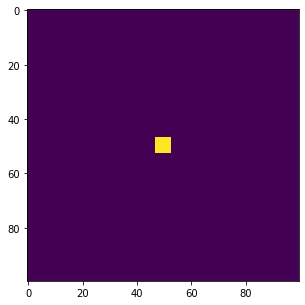

200


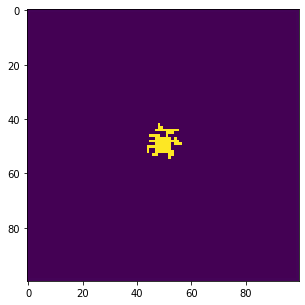

400


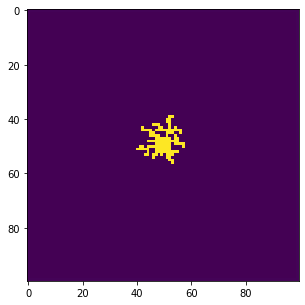

600


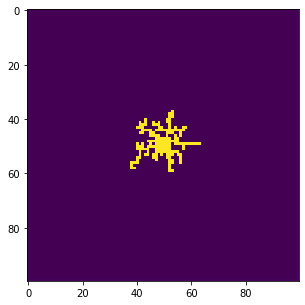

800


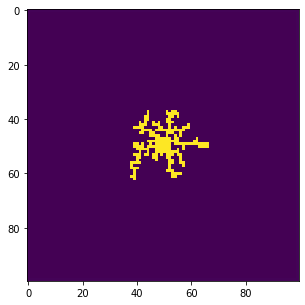

1000


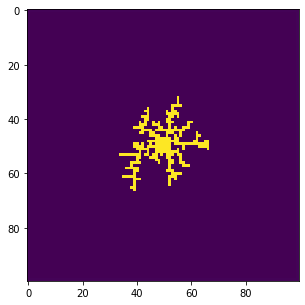

1200


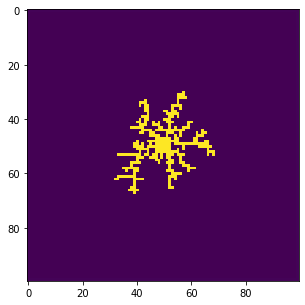

1400


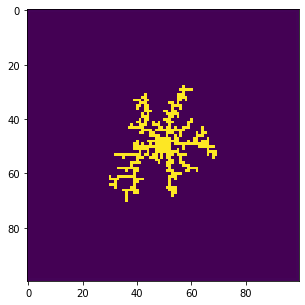

1600


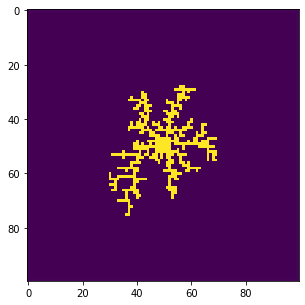

1800


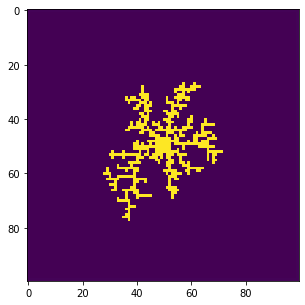

2000


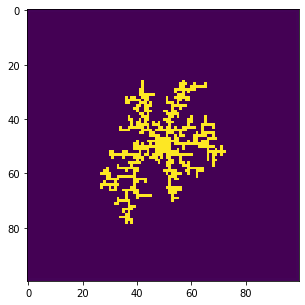

2200


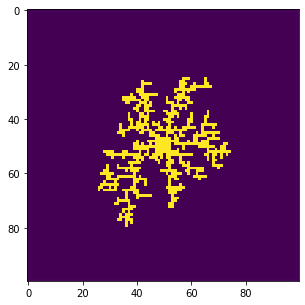

2400


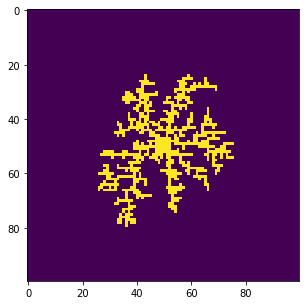

2600


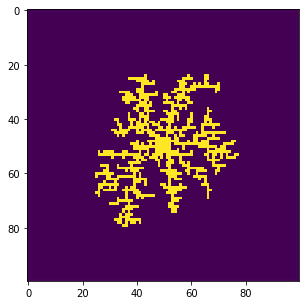

2800


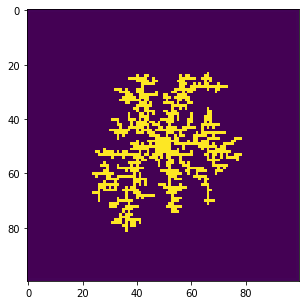

3000


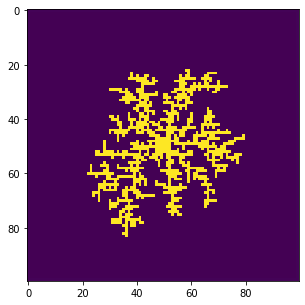

3200


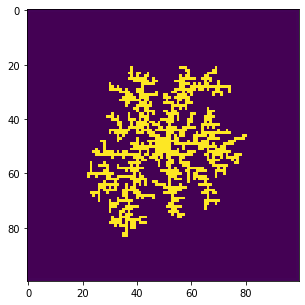

3400


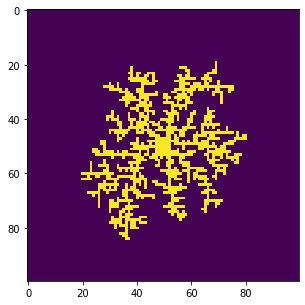

3600


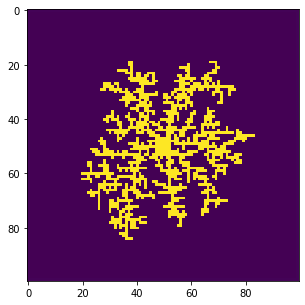

3800


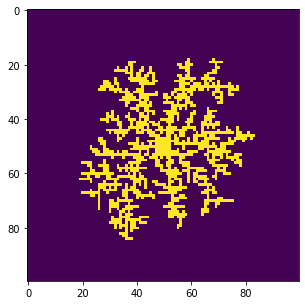

4000


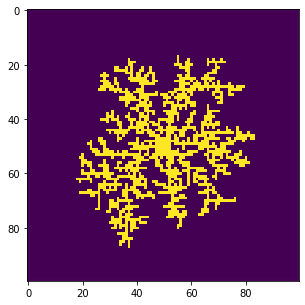

4200


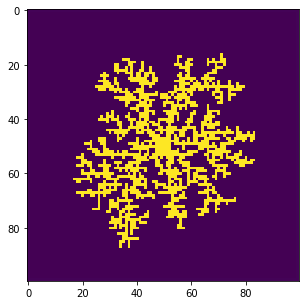

4400


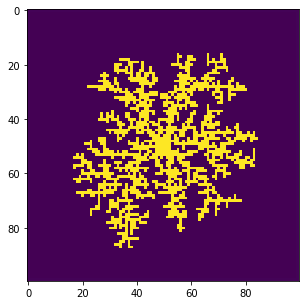

4600


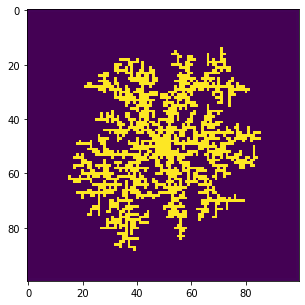

4800


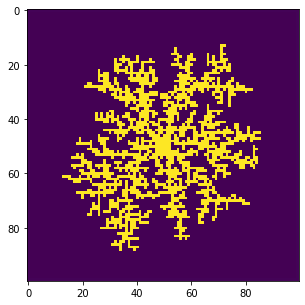

In [6]:
import numpy as np
import numpy.random as rand
%matplotlib inline 
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

def importlibraries():
    import numpy as np
    import numpy.random as rand
    %matplotlib inline 
    from matplotlib import pyplot as plt
    plt.rcParams["figure.figsize"] = (20,5)

def makedish(bsize):
    dish = np.zeros((bsize,bsize),dtype='int')
    seed = int(bsize/2)
    #crys = dish[seed-2:seed+2,seed-2:seed+2]
    dish[seed-3:seed+3,seed-3:seed+3] = 100
    dish[0,:] = 1
    dish[bsize-1,:] = 1
    dish[:,0] = 1
    dish[:,bsize-1] = 1
    #plt.imshow(dish, interpolation='nearest')
    #plt.show()
    print(np.size(dish),np.sum(dish))
    return dish

#picks random point, returns coordinates
def pickpoint():        
    row,col = rand.randint(0,bsize-2),rand.randint(0,bsize-2)
    return row,col

#given a coordinate pair, returns a 1d array of neighbors [[row-1,col],[row+1,col],[row,col-1],[row,col+1]]
def neighbors(row,col):        
    adj = np.array([[row-1,col],[row+1,col],[row,col-1],[row,col+1]])
    return adj

def plotdish(dish):
    plt.imshow(dish, interpolation='nearest')
    plt.show()

#runs the crystal growth
def dla(dish):
    for i in range(5000):
        row,col = pickpoint()               #limit this so that it picks random numbers outside crystal
        count = 0
        for j in range(5000):                #initiates walk, sets the while loop termination condition
            if dish[row-1,col] == 100 or dish[row+1,col] == 100 or dish[row,col-1] == 100 or dish[row,col+1] == 100:
                dish[row,col] = 100
                #print('POINT',j,'Hit:',[row,col])
                continue                            #when an edge is found, ends walk, starts new
            elif dish[row-1,col] == 1 or dish[row+1,col] == 1 or dish[row,col-1] == 1 or dish[row,col+1] == 1:
                #print('hit border')
                continue
            else:
                #dish[row,col] = 10                #if no surface met, randomly picks next step
                row = row + rand.randint(-1,2)
                col = col + rand.randint(-1,2) 
                #print(count,'step to',[row,col])
                continue                              #???????????????
        if i == 0 or i % 200 == 0:
            print(i)
            plotdish(dish)
    

#run this code to get crystal:
bsize = 100
dish = makedish(bsize)
dla(dish)
            
#End Condition: crystal size